In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
import os

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line for the missing resource

print("Libraries imported and NLTK data checked.")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Cell X: Load the Financial News Dataset and Historical Stock Data

try:
    news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
    print("Financial News Dataset (raw_analyst_ratings.csv) loaded successfully!")
    print("Shape:", news_df.shape)
    print("\nFirst 5 rows of news data:")
    print(news_df.head())
    print("\nNews data info:")
    news_df.info()
except FileNotFoundError:
    print(f"Error: raw_analyst_ratings.csv not found. Ensure it's in the 'data/' folder.")
    print("Current working directory for debugging:", os.getcwd())


stock_data_path = '../data/yfinance_data/'
stock_files = [f for f in os.listdir(stock_data_path) if f.endswith('_historical_data.csv')]

historical_dfs = {}
for filename in stock_files:
    ticker = filename.split('_')[0]
    try:
        historical_dfs[ticker] = pd.read_csv(os.path.join(stock_data_path, filename))
        print(f"\n{ticker} Historical Data loaded successfully!")
        print(f"Shape for {ticker}:", historical_dfs[ticker].shape)
        print(f"First 3 rows for {ticker}:")
        print(historical_dfs[ticker].head(3))
        historical_dfs[ticker].info()
    except FileNotFoundError:
        print(f"Error: {filename} not found in {stock_data_path}")

aapl_df = historical_dfs.get('AAPL')
if aapl_df is not None:
    print("\nAccessed AAPL data successfully.")
else:
    print("\nAAPL data not found in loaded historical data.")

Financial News Dataset (raw_analyst_ratings.csv) loaded successfully!
Shape: (1407328, 6)

First 5 rows of news data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                      

In [ ]:
import os

news_df['date'] = pd.to_datetime(news_df['date'], utc=True, errors='coerce')
news_df.dropna(subset=['date'], inplace=True)

if 'Unnamed: 0' in news_df.columns:
    news_df.drop('Unnamed: 0', axis=1, inplace=True)

print("News DataFrame after date conversion and cleanup:")
print(news_df.info())
print("\nFirst 5 rows of cleaned news data:")
print(news_df.head())


for ticker, df in historical_dfs.items():
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    historical_dfs[ticker] = df
    print(f"\n{ticker} stock data after date conversion, cleanup, and setting index:")
    print(historical_dfs[ticker].info())
    print(f"First 3 rows for {ticker}:")
    print(historical_dfs[ticker].head(3))

aapl_df = historical_dfs.get('AAPL')
if aapl_df is not None:
    print("\nAccessed Processed AAPL data successfully.")
    print(aapl_df.head())

News DataFrame after date conversion and cleanup:
<class 'pandas.core.frame.DataFrame'>
Index: 55987 entries, 0 to 1407270
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   headline   55987 non-null  object             
 1   url        55987 non-null  object             
 2   publisher  55987 non-null  object             
 3   date       55987 non-null  datetime64[ns, UTC]
 4   stock      55987 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 2.6+ MB
None

First 5 rows of cleaned news data:
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                       

Descriptive Statistics for Headline Length:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


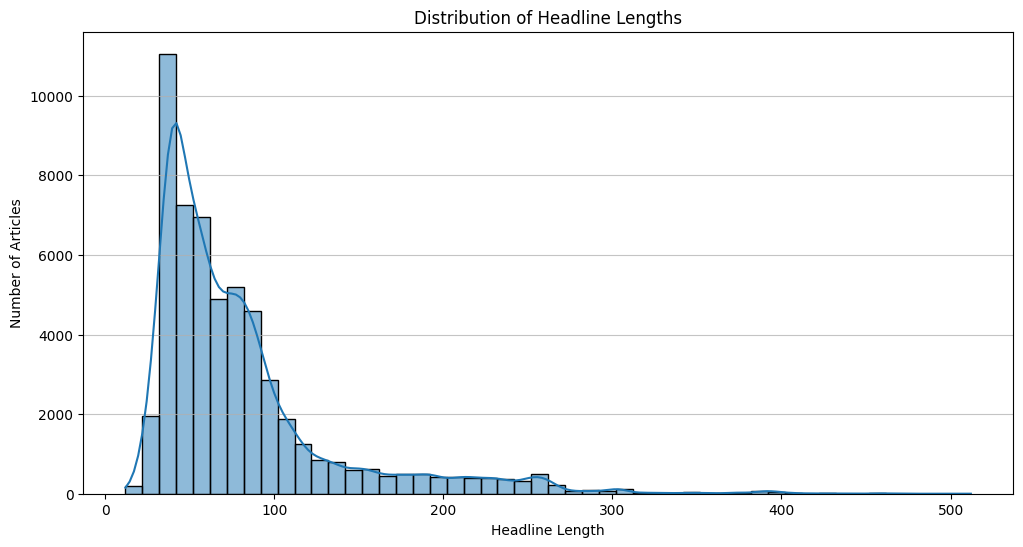


Longest Headlines:
                                                 headline  headline_length
701748  JinkoSolar Tiger Pro Series Receives World's F...              512
39028   Shares of several financial services companies...              458
140381  Shares of several financial services companies...              458
172392  Shares of several financial services companies...              458
197884  Shares of several financial services companies...              458

Shortest Headlines:
                 headline  headline_length
1230366      ETFs for QE3               12
556659    OPEC May Secure               15
371009   The End of OPEC?               16
390349   A Timely New ETF               16
987650   A Timely New ETF               16


In [ ]:
news_df['headline_length'] = news_df['headline'].apply(len)


print("Descriptive Statistics for Headline Length:")
print(news_df['headline_length'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(news_df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Number of Articles')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("\nLongest Headlines:")
print(news_df.loc[news_df['headline_length'].nlargest(5).index, ['headline', 'headline_length']])

print("\nShortest Headlines:")
print(news_df.loc[news_df['headline_length'].nsmallest(5).index, ['headline', 'headline_length']])


Top 10 Publishers by Article Count:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64

Bottom 10 Publishers by Article Count:
publisher
VJ Yahoo                    1
Sumit Mehta                 1
Bryce Matulonis             1
Santhosh Naikar             1
Christopher Dier-Scalise    1
Jennifer Lynn               1
Tatro Capital               1
webmaster                   1
Thomas Stein                1
Usman Rafi                  1
Name: count, dtype: int64


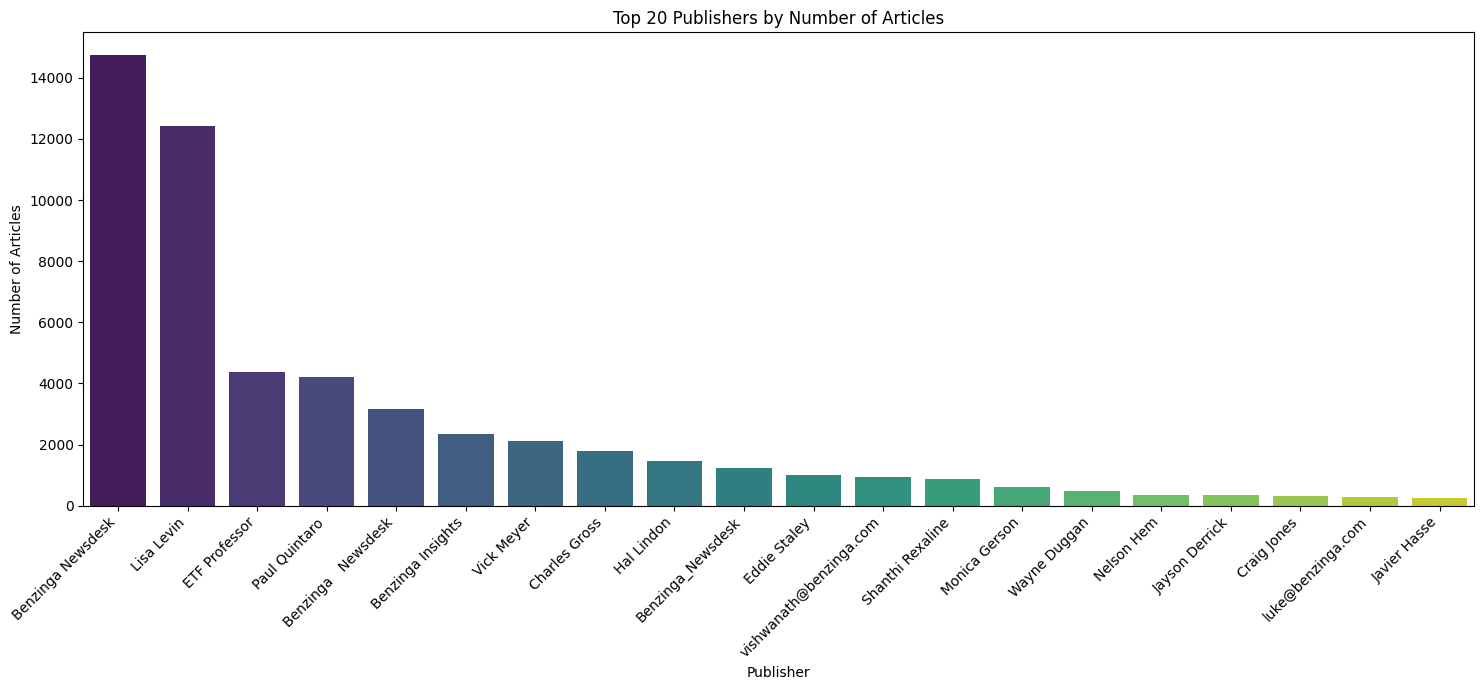

In [ ]:
publisher_counts = news_df['publisher'].value_counts()

print("\nTop 10 Publishers by Article Count:")
print(publisher_counts.head(10))

print("\nBottom 10 Publishers by Article Count:")
print(publisher_counts.tail(10))

plt.figure(figsize=(15, 7))
sns.barplot(x=publisher_counts.head(20).index, y=publisher_counts.head(20).values, hue=publisher_counts.head(20).index, palette='viridis', legend=False)
plt.title('Top 20 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

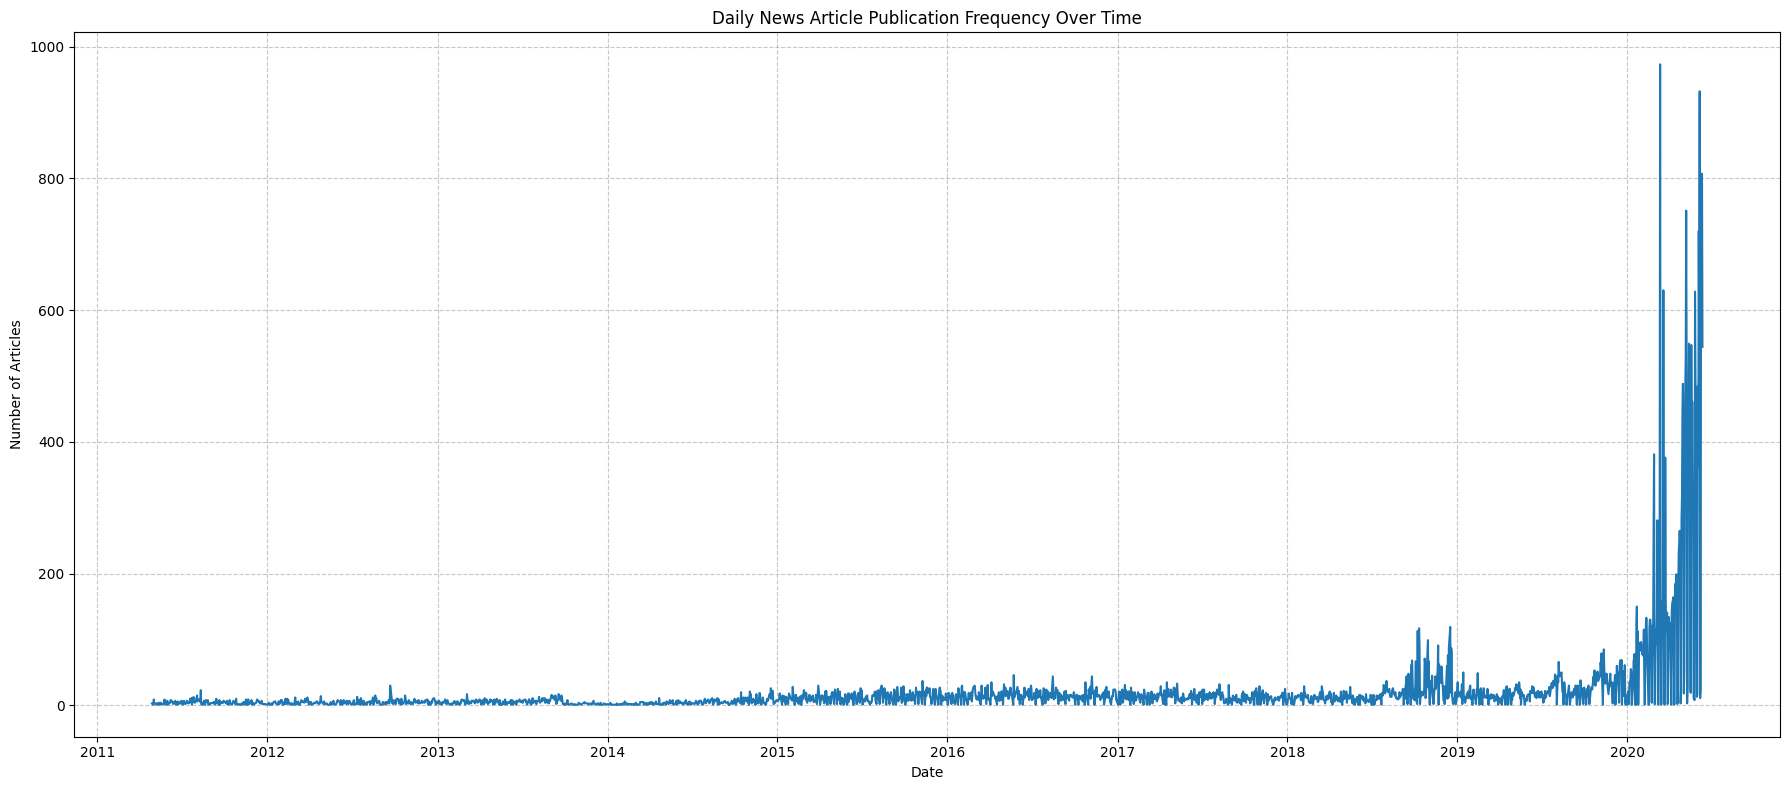

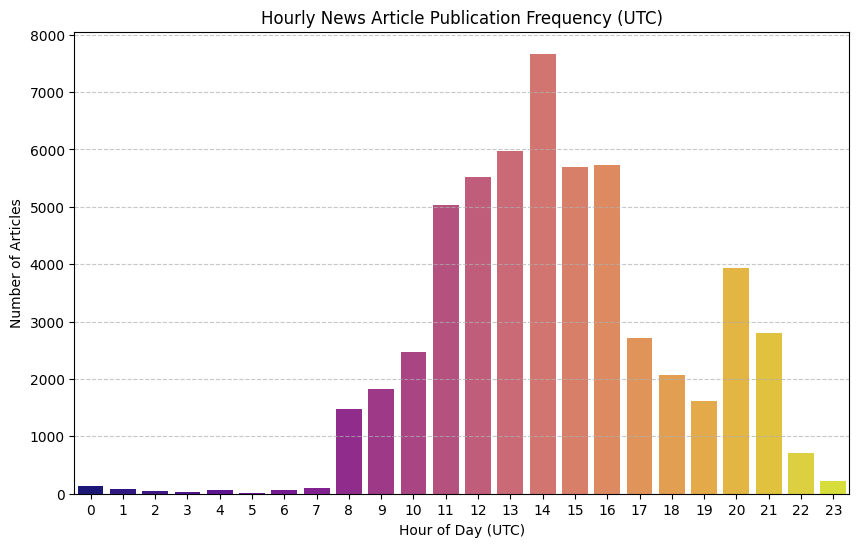

/tmp/ipykernel_15337/3594112847.py:25: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_df['publication_month'] = news_df['date'].dt.to_period('M')


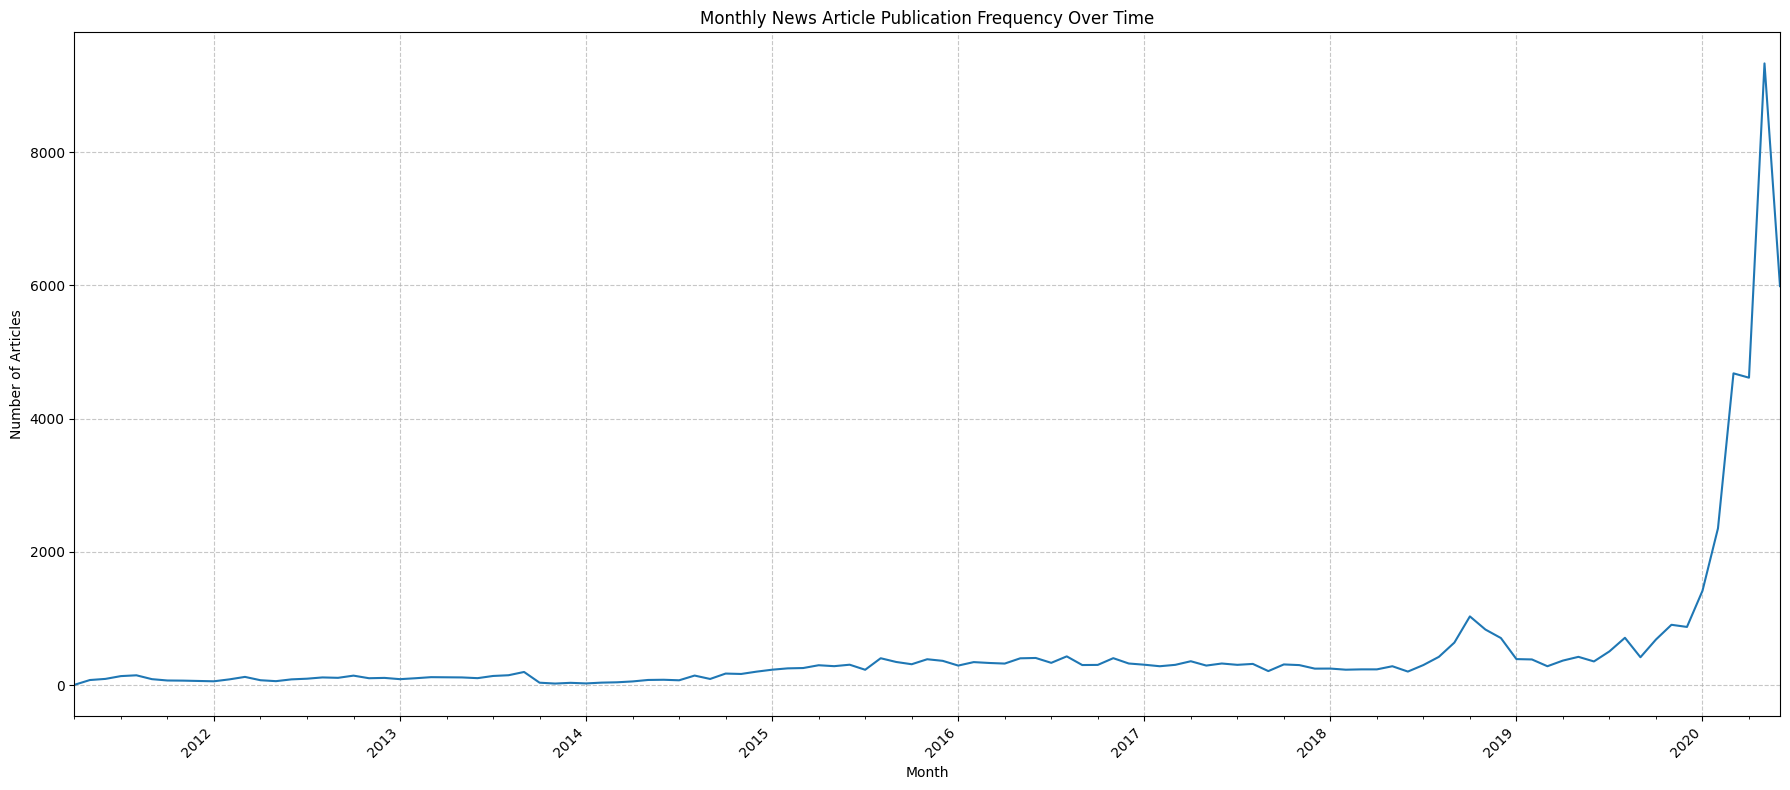

In [ ]:
news_df['publication_date_only'] = news_df['date'].dt.date
daily_news_articles = news_df['publication_date_only'].value_counts().sort_index()

plt.figure(figsize=(18, 8))
daily_news_articles.plot()
plt.title('Daily News Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

news_df['publication_hour'] = news_df['date'].dt.hour
hourly_news_articles = news_df['publication_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_news_articles.index, y=hourly_news_articles.values, palette='plasma', hue=hourly_news_articles.index, legend=False)
plt.title('Hourly News Article Publication Frequency (UTC)')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

news_df['publication_month'] = news_df['date'].dt.to_period('M')
monthly_news_articles = news_df['publication_month'].value_counts().sort_index()

plt.figure(figsize=(18, 8))
monthly_news_articles.plot()
plt.title('Monthly News Article Publication Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 20 Most Common Words:
[('trading', 6572), ('hit', 5898), ('eps', 5530), ('companies', 4778), ('several', 4650), ('sales', 4423), ('higher', 4269), ('estimate', 3818), ('lows', 3741), ('session', 3394), ('maintains', 3266), ('new', 3103), ('yesterday', 3066), ('reports', 3016), ('thursday', 2925), ('moving', 2867), ('etfs', 2739), ('amid', 2672), ('friday', 2633), ('highs', 2608)]


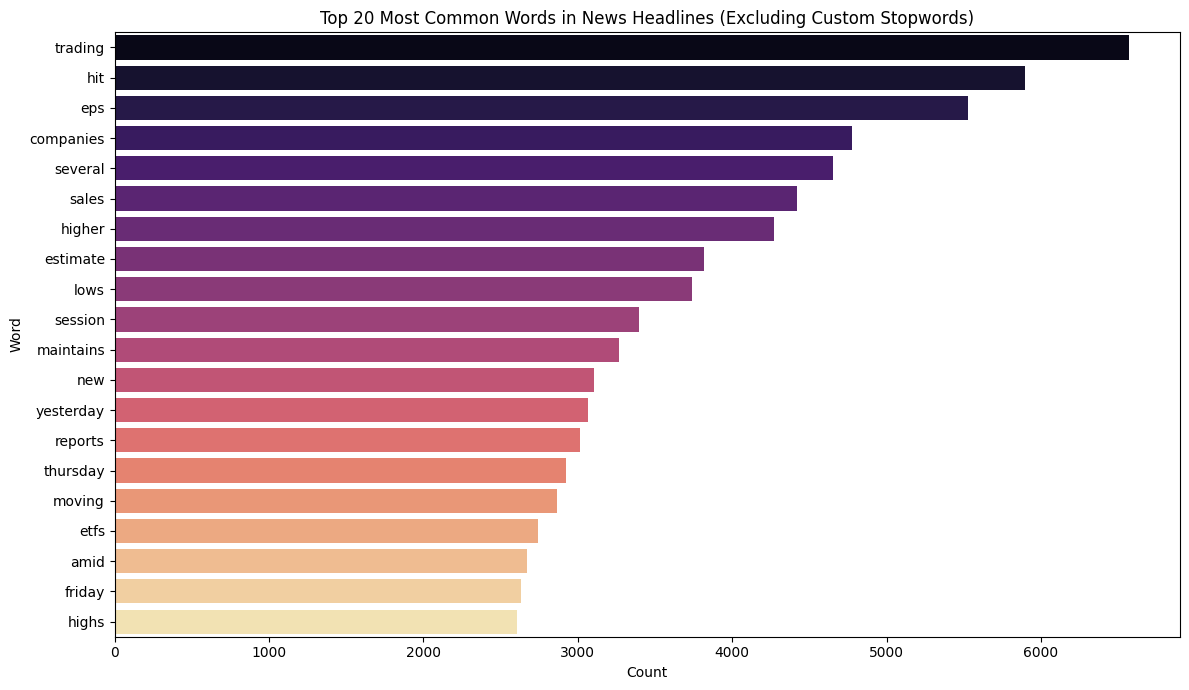


Top 10 Common Bigrams (Two-Word Phrases):
              Bigram  Count
0  companies trading   4093
1           hit lows   3531
2     trading higher   3517
3          hit highs   2315
4      trading lower   2152
5            set new   2057
6     biggest movers   1891
7      lows thursday   1764
8            new low   1736
9     estimate sales   1545

Top 10 Common Trigrams (Three-Word Phrases):
                    Trigram  Count
0  companies trading higher   2566
1         hit lows thursday   1764
2               set new low   1734
3   companies trading lower   1526
4  biggest movers yesterday   1455
5         new low yesterday   1313
6         lows thursday hit   1074
7        eps beats estimate   1014
8       sales beat estimate    961
9         thursday hit lows    928


In [ ]:
from nltk.util import ngrams

news_df['headline'] = news_df['headline'].astype(str).fillna('')

all_headlines_text = ' '.join(news_df['headline'])

stop_words = set(stopwords.words('english'))
custom_stopwords = ['stock', 'stocks', 'market', 'news', 'report', 'company', 'shares', 'firm', 'group', 'analyst', 'ratings', 'target', 'price', 'rise', 'fall', 'move', 'financial', 'says', 'update', 'reiterates', 'up', 'down', 'out', 'into', 'from', 'with', 'for', 'about', 'on', 'investors']
stop_words.update(custom_stopwords)

word_tokens = word_tokenize(all_headlines_text.lower())
filtered_words = [word for word in word_tokens if word.isalpha() and word not in stop_words and len(word) > 2]

word_counts = Counter(filtered_words)
print("Top 20 Most Common Words:")
print(word_counts.most_common(20))

top_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Word', data=top_words_df.sort_values(by='Count', ascending=False), palette='magma', hue='Word', legend=False)
plt.title('Top 20 Most Common Words in News Headlines (Excluding Custom Stopwords)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

print("\nTop 10 Common Bigrams (Two-Word Phrases):")
bigrams = Counter(ngrams(filtered_words, 2))
top_bigrams_df = pd.DataFrame(bigrams.most_common(10), columns=['Bigram', 'Count'])
top_bigrams_df['Bigram'] = top_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))
print(top_bigrams_df)

print("\nTop 10 Common Trigrams (Three-Word Phrases):")
trigrams = Counter(ngrams(filtered_words, 3))
top_trigrams_df = pd.DataFrame(trigrams.most_common(10), columns=['Trigram', 'Count'])
top_trigrams_df['Trigram'] = top_trigrams_df['Trigram'].apply(lambda x: ' '.join(x))
print(top_trigrams_df)

--- AAPL Stock Data Overview ---

Descriptive Statistics for AAPL:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00  

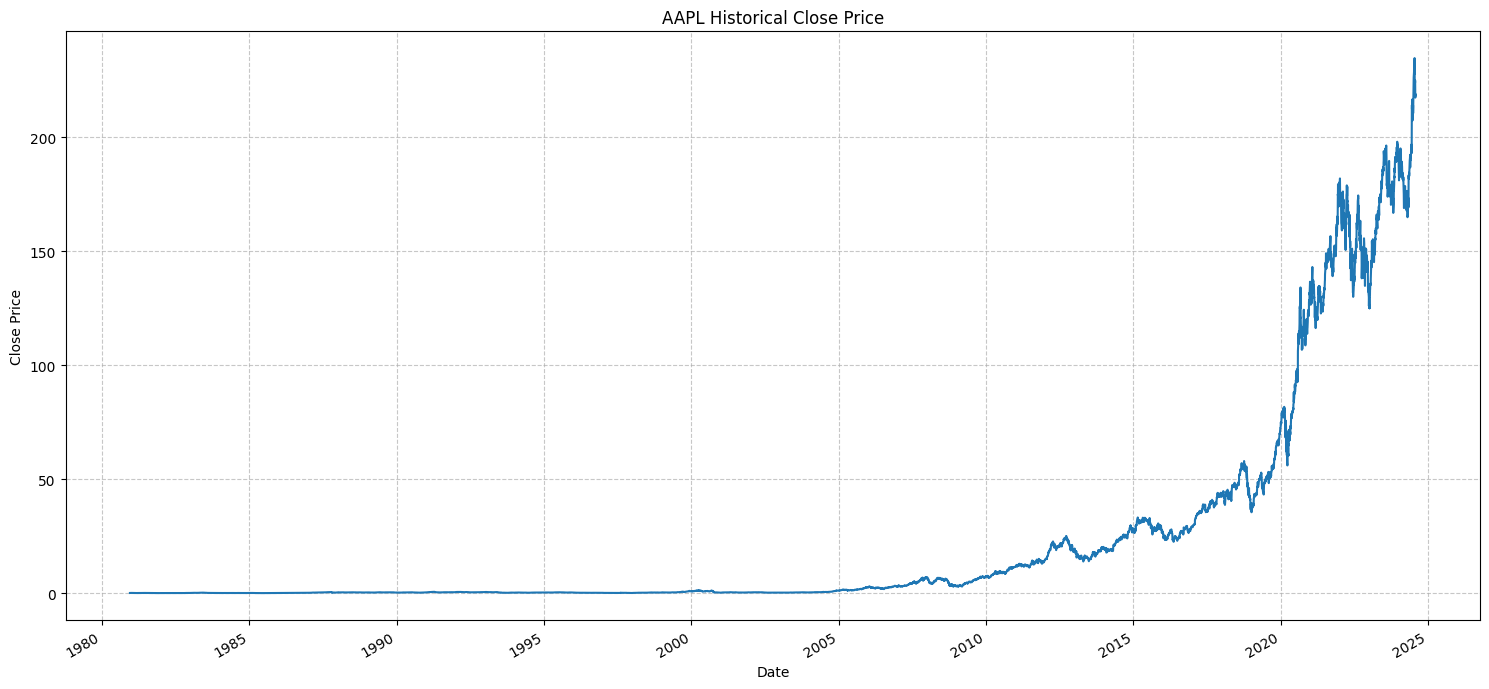

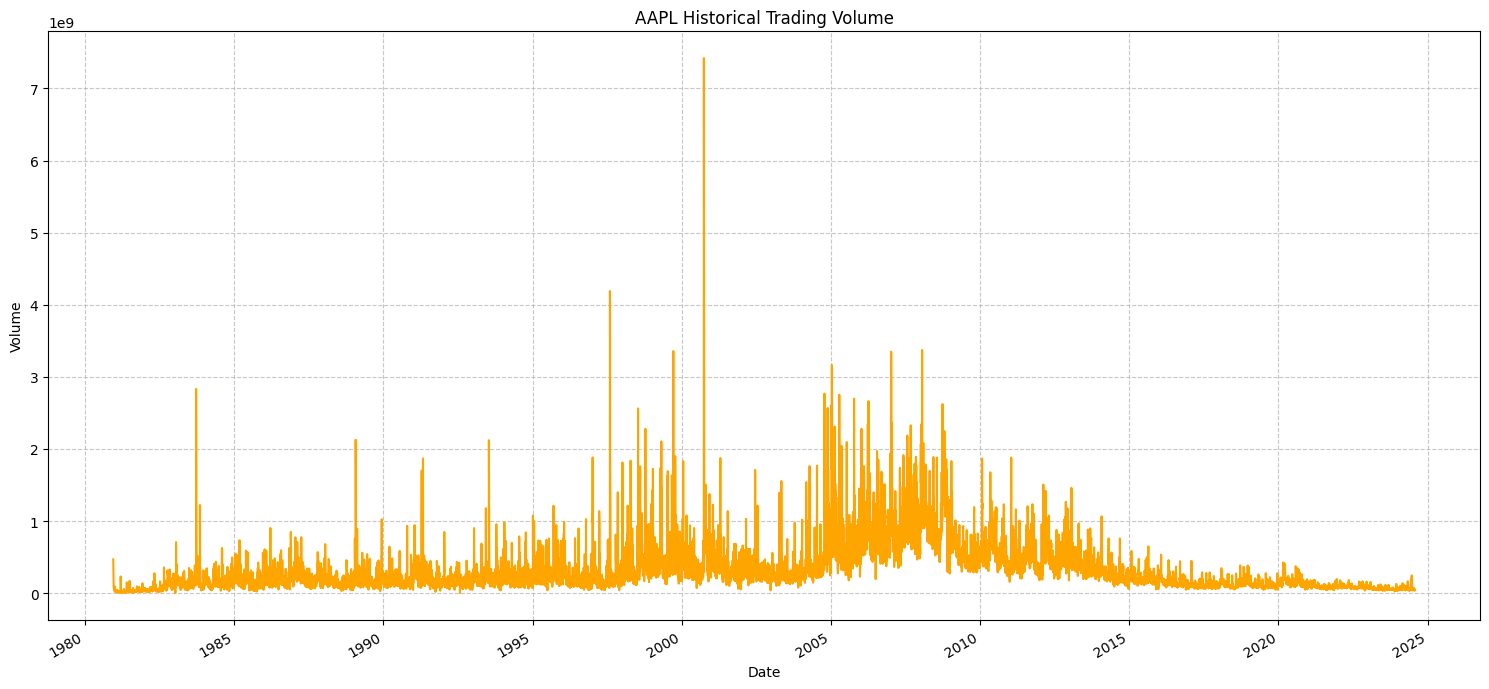

In [ ]:
print("--- AAPL Stock Data Overview ---")

print("\nDescriptive Statistics for AAPL:")
print(aapl_df.describe())

plt.figure(figsize=(15, 7))
aapl_df['Close'].plot(title='AAPL Historical Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
aapl_df['Volume'].plot(title='AAPL Historical Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
for ticker, df in historical_dfs.items():
    print(f"\n--- {ticker} Stock Data Overview ---")
    print(df.describe())
    print("\n" + "="*50) 


--- AMZN Stock Data Overview ---
              Open         High          Low        Close    Adj Close  \
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000   
mean     37.360464    37.801009    36.882561    37.351096    37.351096   
std      53.756955    54.366449    53.087051    53.729913    53.729913   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       2.070125     2.120625     2.040156     2.076750     2.076750   
50%       8.574500     8.666750     8.466500     8.591500     8.591500   
75%      50.453876    50.723249    50.059875    50.426500    50.426500   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             Volume  Dividends  Stock Splits  
count  6.846000e+03     6846.0   6846.000000  
mean   1.380713e+08        0.0      0.003944  
std    1.382346e+08        0.0      0.246789  
min    9.744000e+06        0.0      0.000000  
25%    6.505442e+07        0.0      0.000000  
50%    1.020650e+

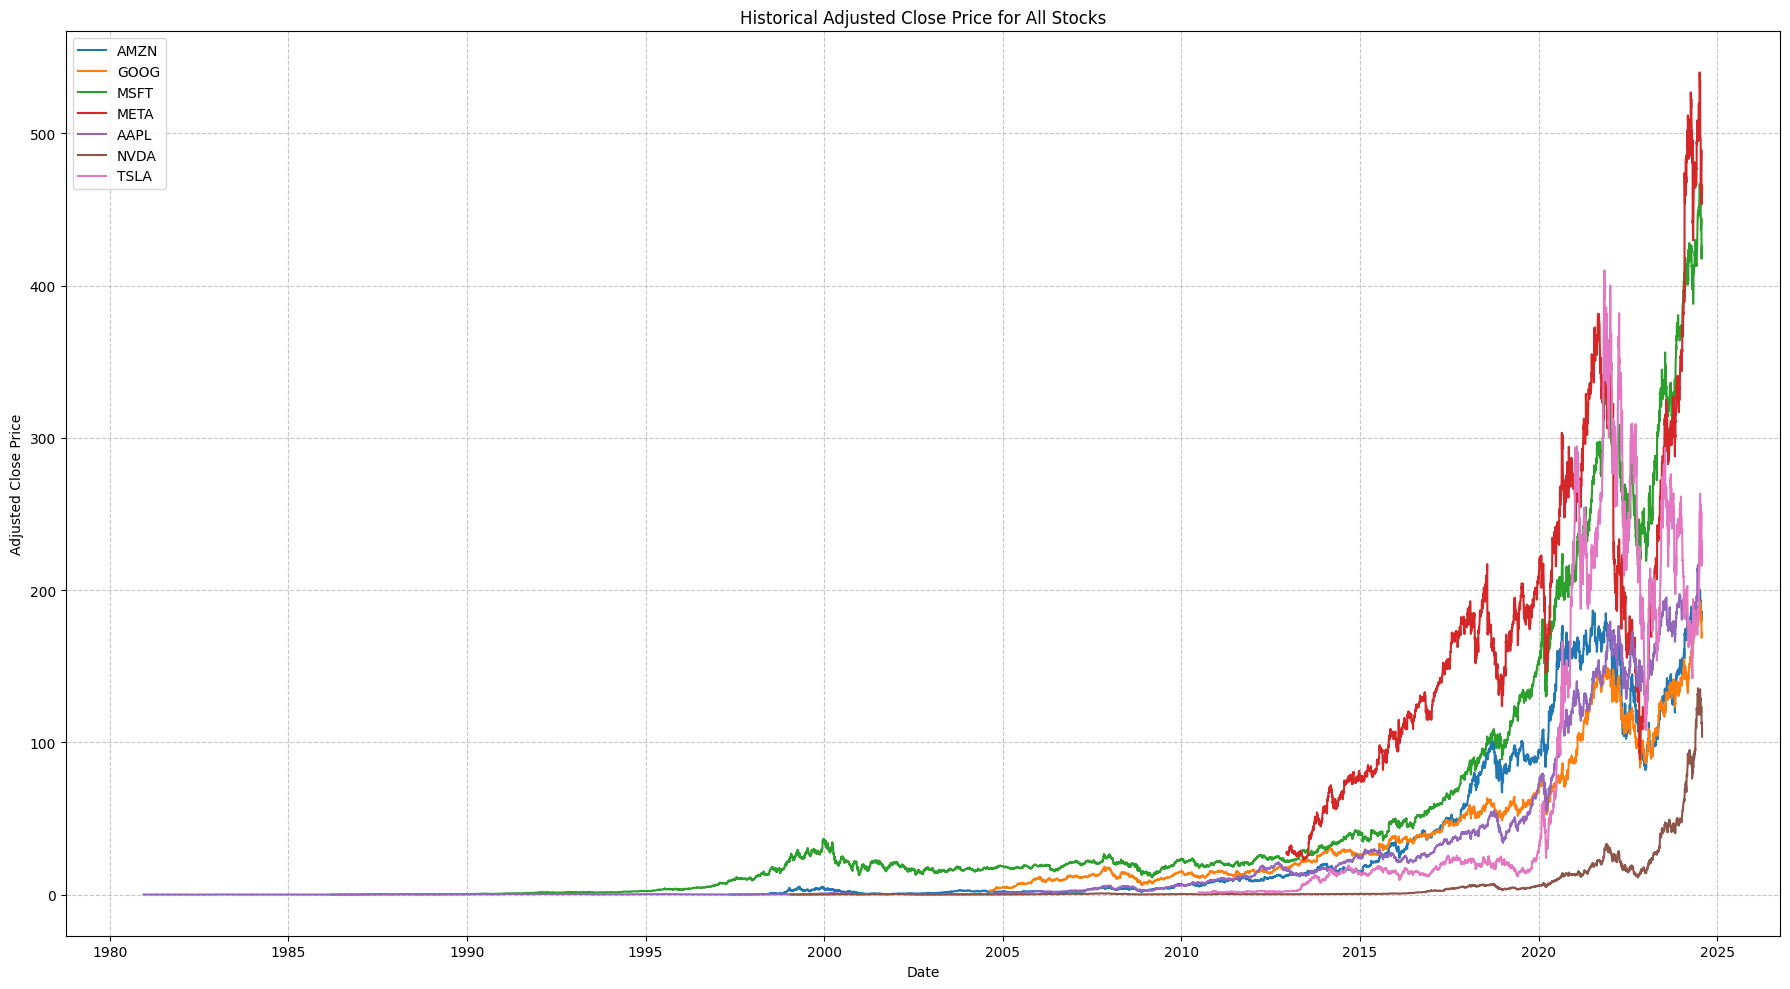

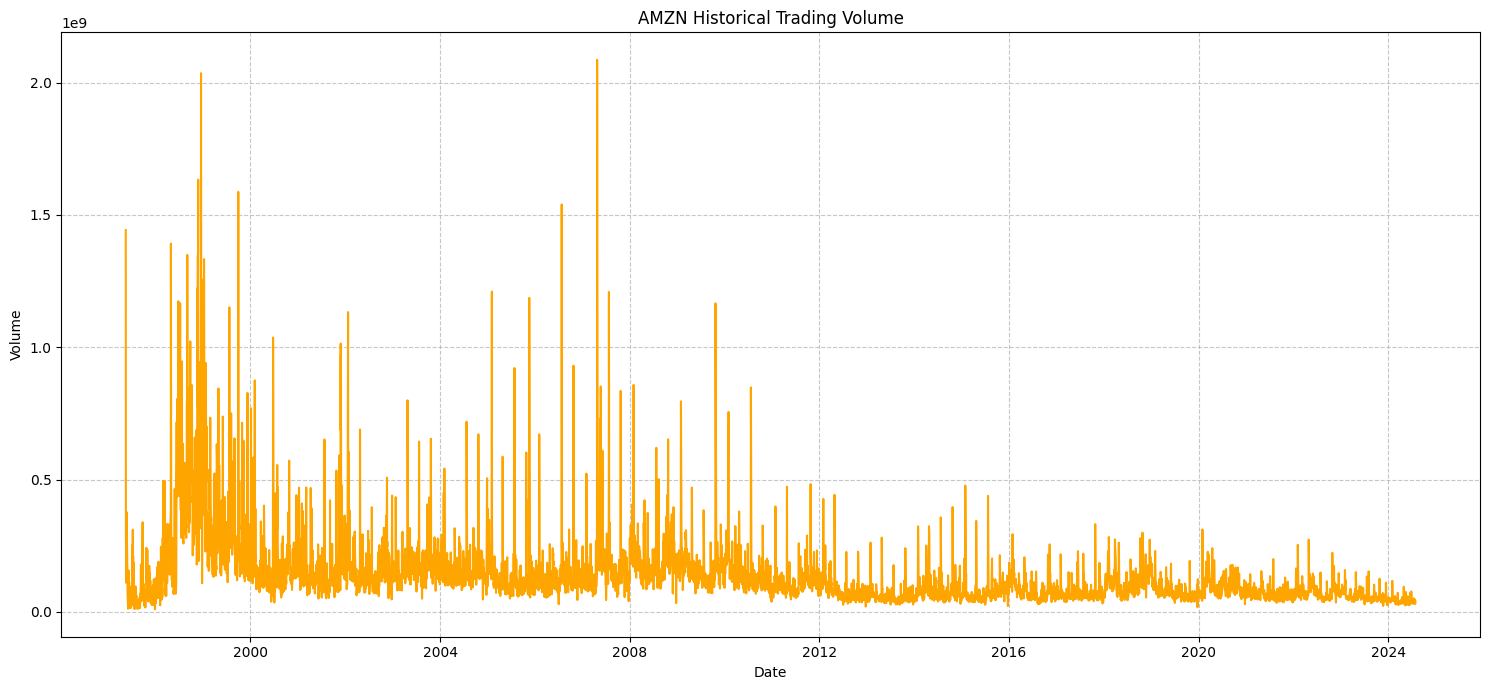

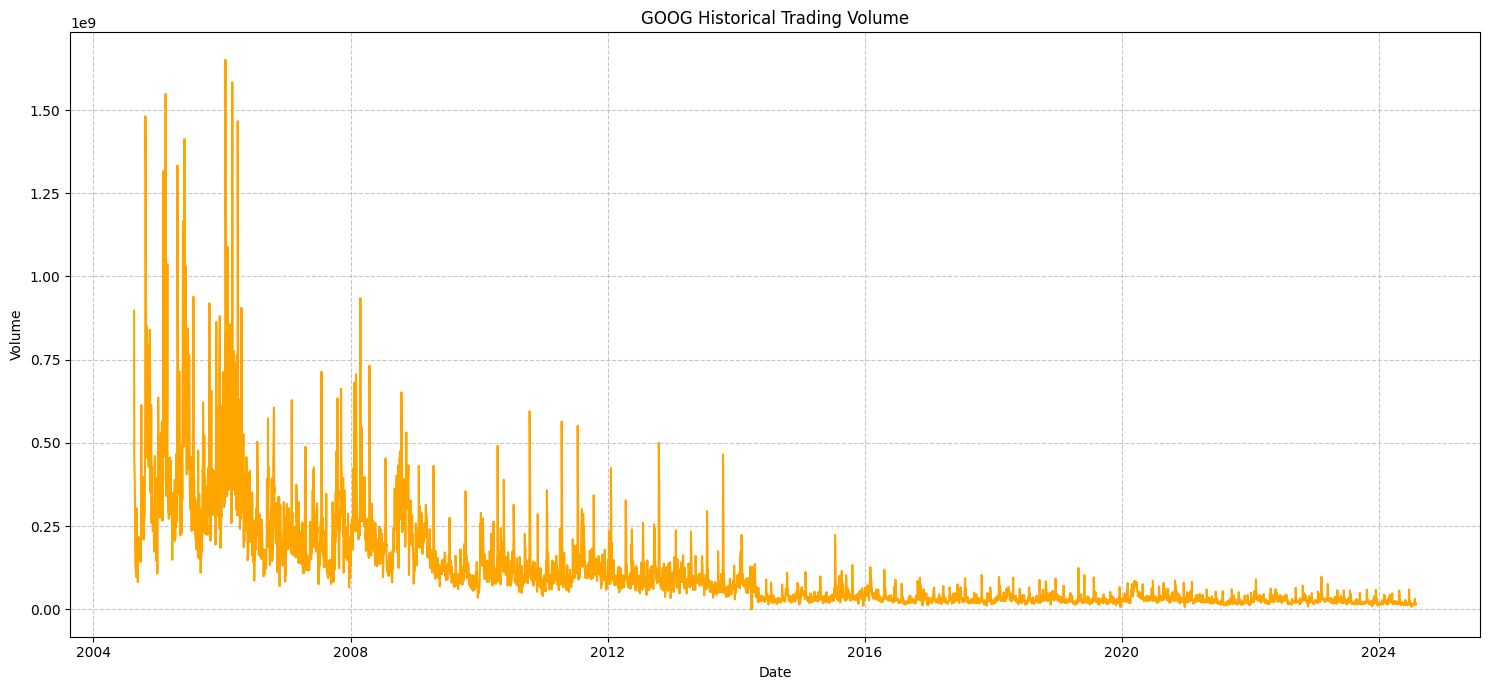

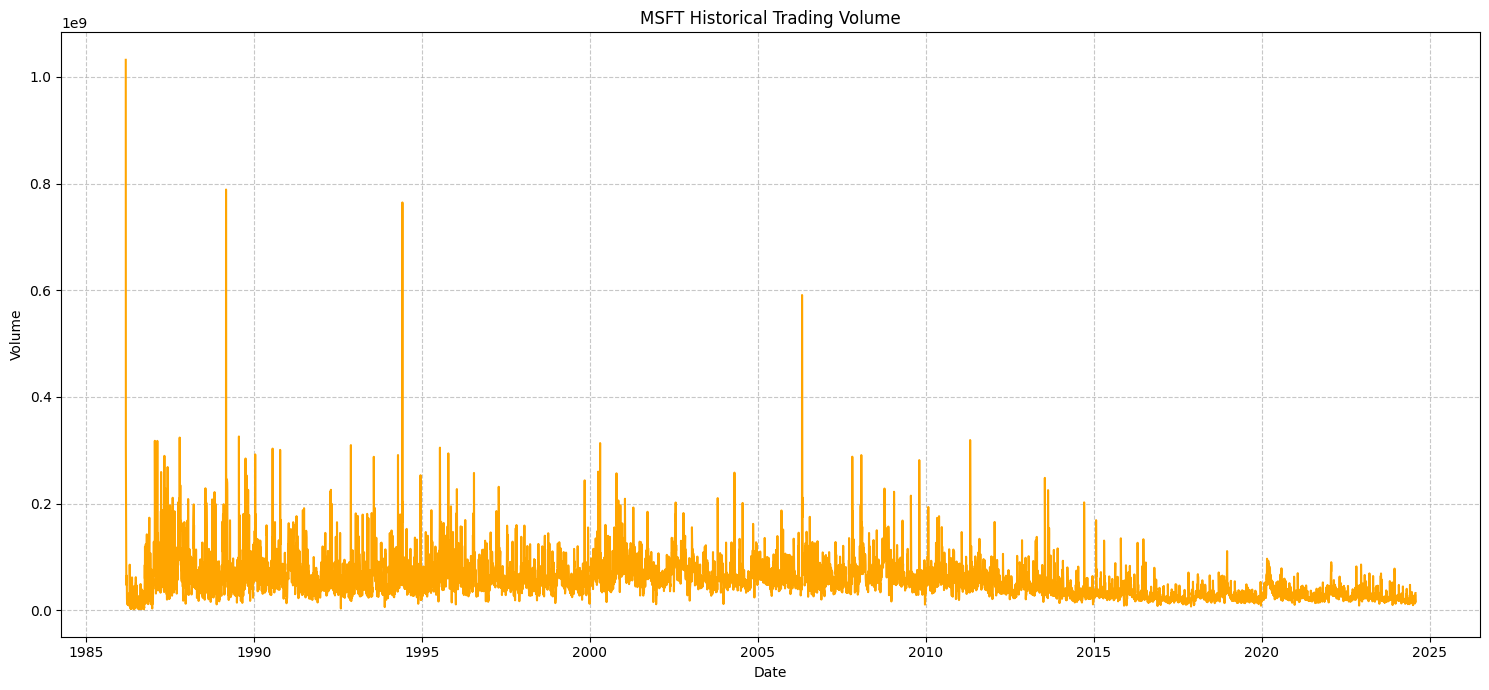

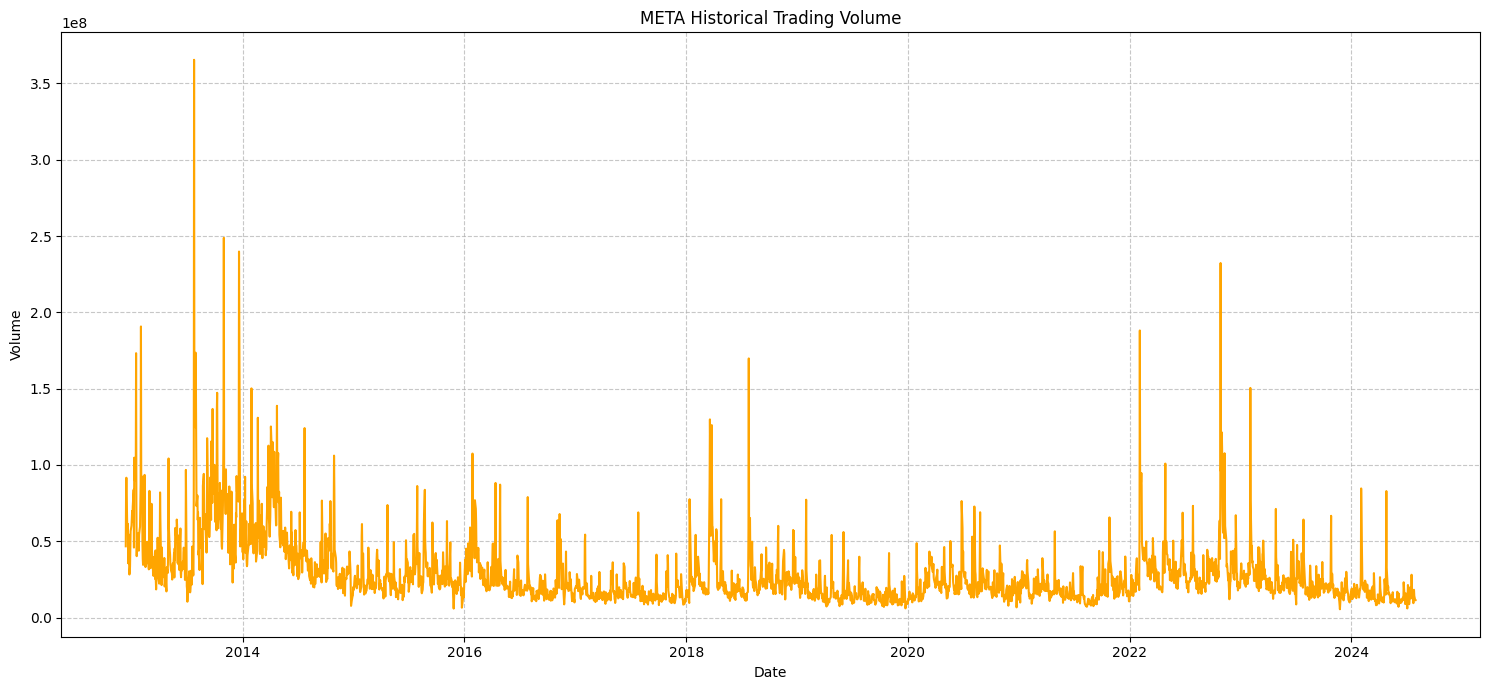

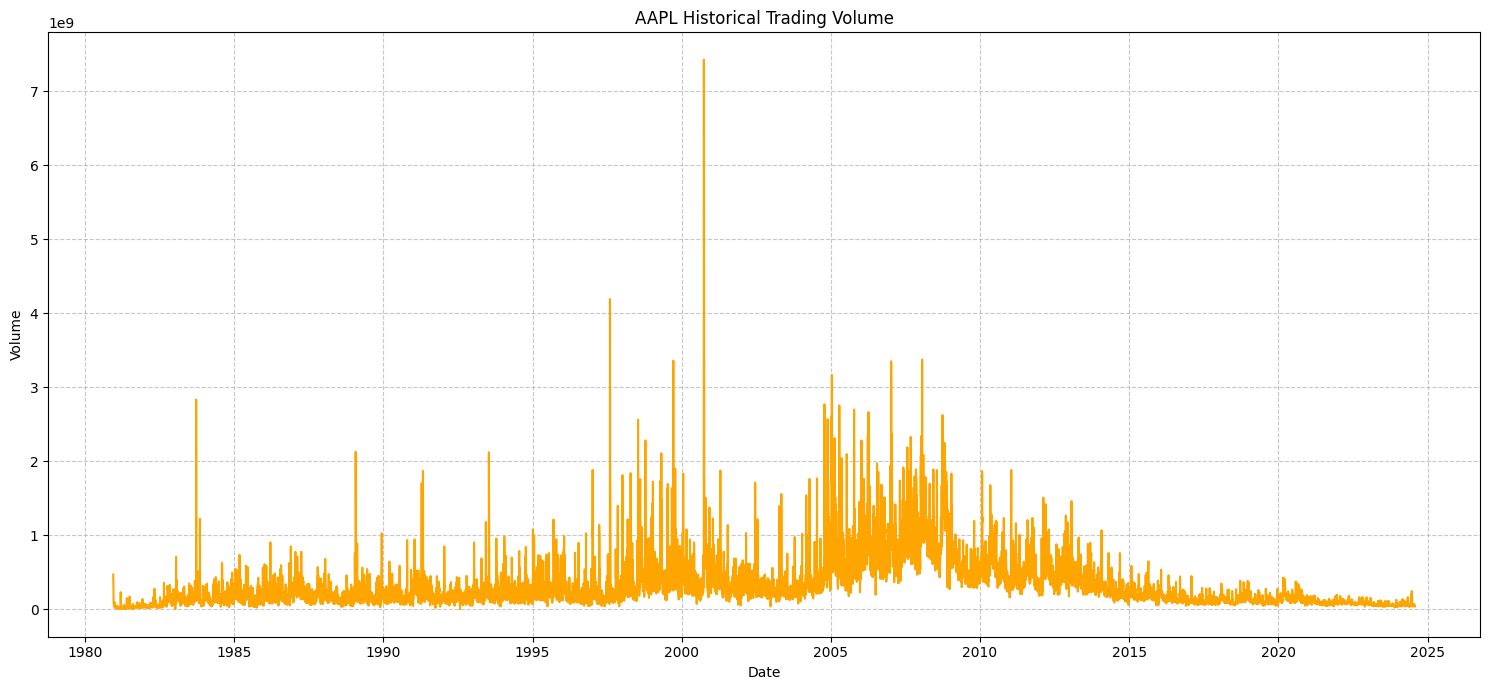

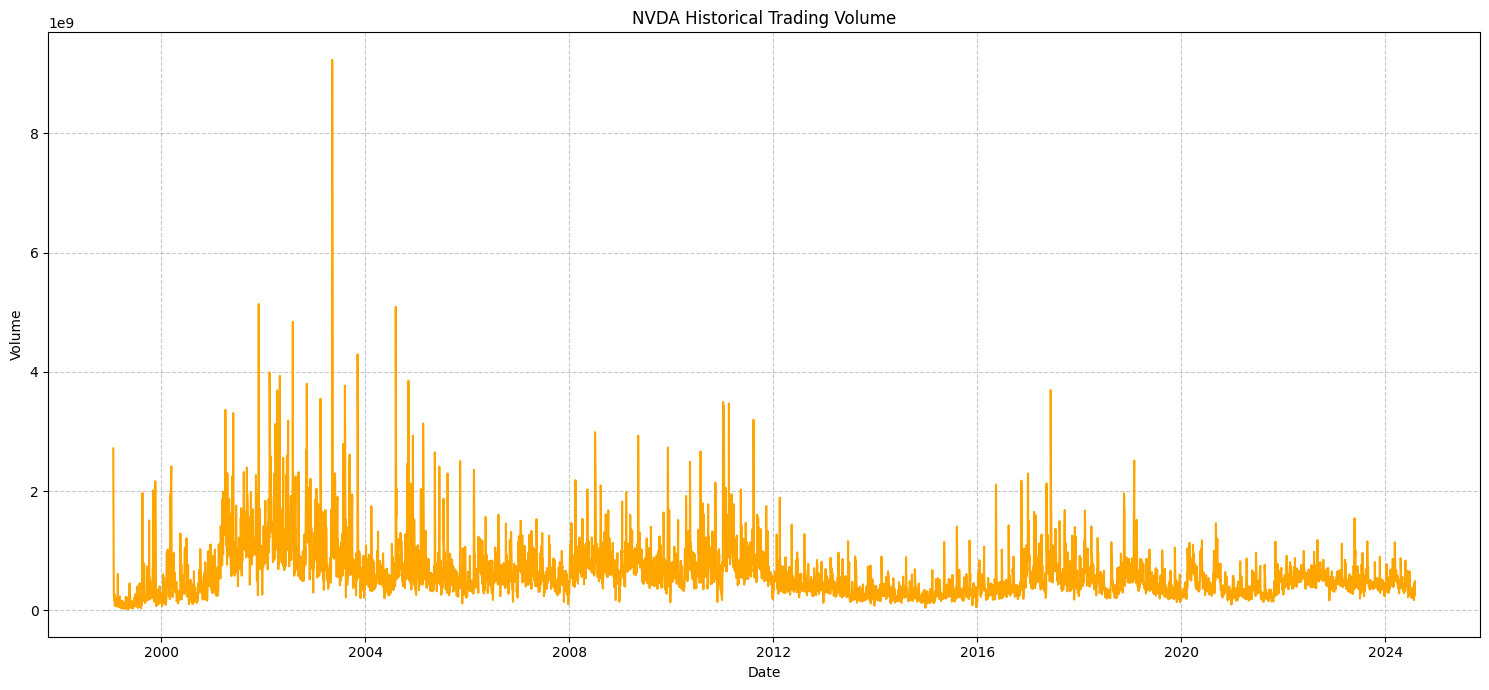

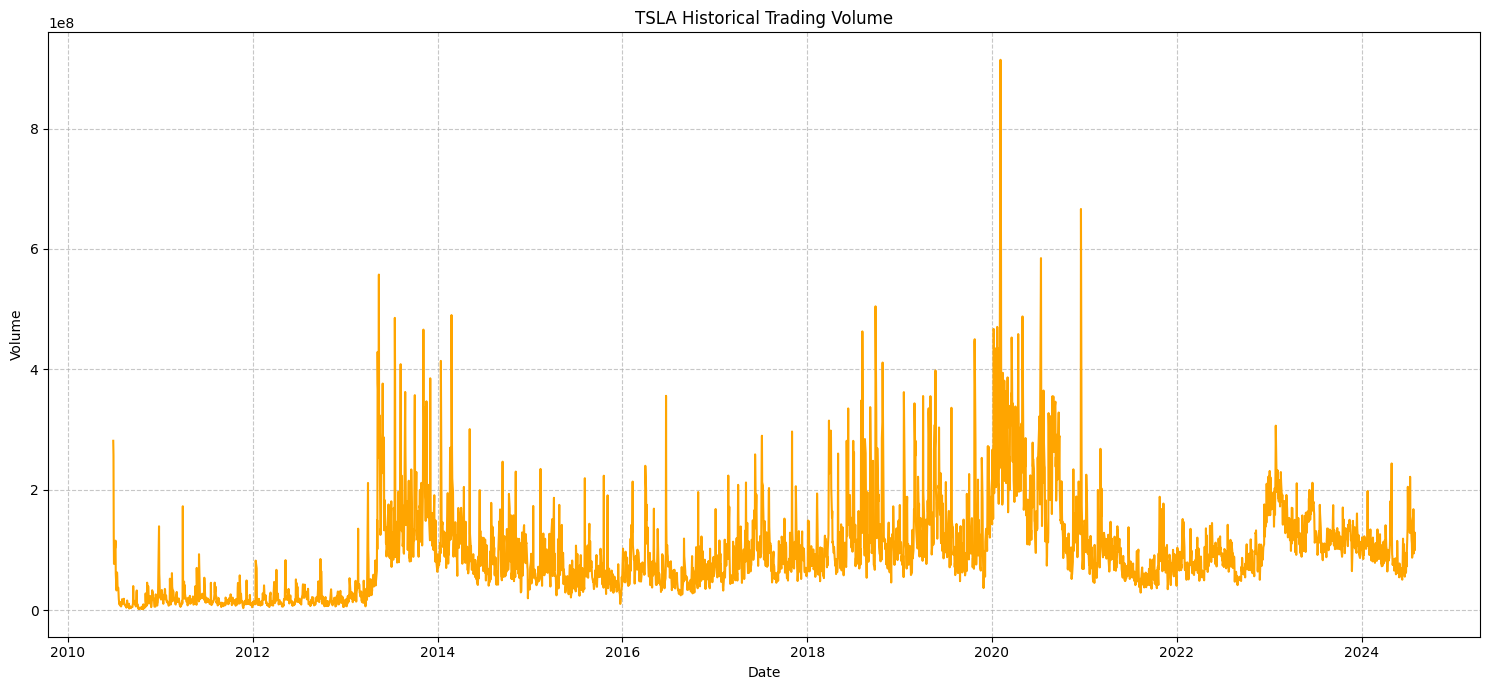

In [ ]:
plt.figure(figsize=(18, 10))
for ticker, df in historical_dfs.items():
    plt.plot(df.index, df['Adj Close'], label=ticker)

plt.title('Historical Adjusted Close Price for All Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for ticker, df in historical_dfs.items():
    plt.figure(figsize=(15, 7))
    plt.plot(df.index, df['Volume'], label=ticker + ' Volume', color='orange')
    plt.title(f'{ticker} Historical Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()